In [6]:
include("speciale_tools.jl")
import JLD
import PyPlot

In [7]:

min_vv = -19
max_vv = 4

min_vh = -26
max_vh = -3

min_r = -10
max_r = 1;

min_h = -10
max_h = 100;



In [8]:
import Dates

function _sort_jld_files(file_list,date_position )
    name_list = [split(elem,".")[1] for elem in file_list]
    date_string = [split(elem,"_")[date_position] for elem in name_list]
    date = [Dates.Date(parse.(Int, [elem[1:4], elem[5:6], elem[7:8]])...) for elem in date_string]
    return file_list[sortperm(date)][end:-1:1]
end

function _sort_prossed_files(data_folder,sort_master = true)
    files = readdir(data_folder)


    files = [elem for elem in files if length(elem)>1]
    files = [elem for elem in files if length(split(elem,"_"))>3]

    coherence_idx = [split(elem,"_")[2]=="coh" for elem in files]
    coherence_files = files[coherence_idx ]  
    if sort_master 
        coherence_files = _sort_jld_files(coherence_files,6)
    else
        _sort_jld_files(coherence_files,8)
    end

    coherence_VV_files = [ elem for elem in coherence_files if split(elem,"_")[4]=="VV"]
    coherence_VH_files = [ elem for elem in coherence_files if split(elem,"_")[4]=="VH"]                    

    VV_idx = [(split(elem,"_")[1]=="sigma") & (split(elem,"_")[3]=="VV") for elem in files];
    VV_files = files[VV_idx] 
    VV_files = _sort_jld_files(VV_files,4)

    VH_idx = [(split(elem,"_")[1]=="sigma") & (split(elem,"_")[3]=="VH") for elem in files];
    VH_files= files[VH_idx];                 
    VH_files = _sort_jld_files(VH_files,4)
                                                
    return VV_files,VH_files,coherence_VV_files,coherence_VH_files 
end
                                                
function _load_jld(file_list,data_folder)
    path_names = [joinpath(data_folder,elem) for elem in file_list]
    return [JLD.load(elem,"data") for elem in path_names]
end

_load_jld (generic function with 1 method)

# Vejle

In [28]:
data_folder = "/Users/simon/Documents/DTU fag/Speciale/vejle_new"
data_folder = "/home/data/simon/processed/test_areas/vejle_new"

"/home/data/simon/processed/test_areas/vejle_new"

In [29]:
VV_files,VH_files,coherence_VV_files,coherence_VH_files = _sort_prossed_files(data_folder);

In [30]:
VV_files

8-element Array{String,1}:
 "sigma_S1A_VV_20200217.jld"
 "sigma_S1B_VV_20200211.jld"
 "sigma_S1A_VV_20200205.jld"
 "sigma_S1B_VV_20200130.jld"
 "sigma_S1A_VV_20200124.jld"
 "sigma_S1B_VV_20200118.jld"
 "sigma_S1A_VV_20200112.jld"
 "sigma_S1B_VV_20200106.jld"

In [31]:
VV = _load_jld(VV_files,data_folder);

In [32]:
VV_co = VV[1]
VV_pre = VV[2:end]
VV_pre = SlcUtil.temporal_filter(VV_pre,5);

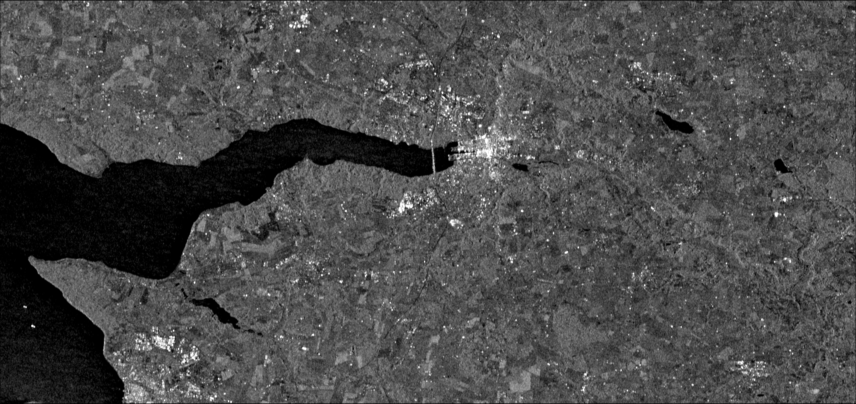

In [33]:
Colors.Gray.(db_scale_img(VV[4],min_vv,max_vv))

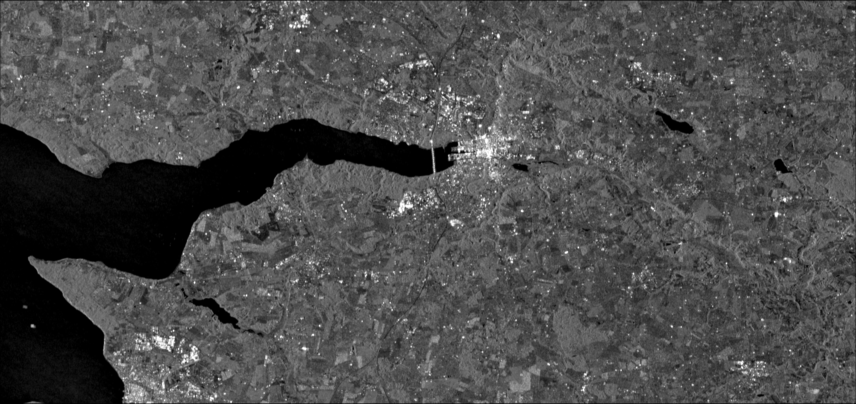

In [34]:
VV_pre_mean = sum(VV_pre)./length(VV_pre)
img = Colors.Gray.(db_scale_img(VV_pre_mean,min_vv,max_vv))


In [35]:
file_path = joinpath(data_folder,"flood","VV_pre")

JLD.save(file_path*".jld", "data", VV_pre_mean)
FileIO.save(file_path*".png",img)

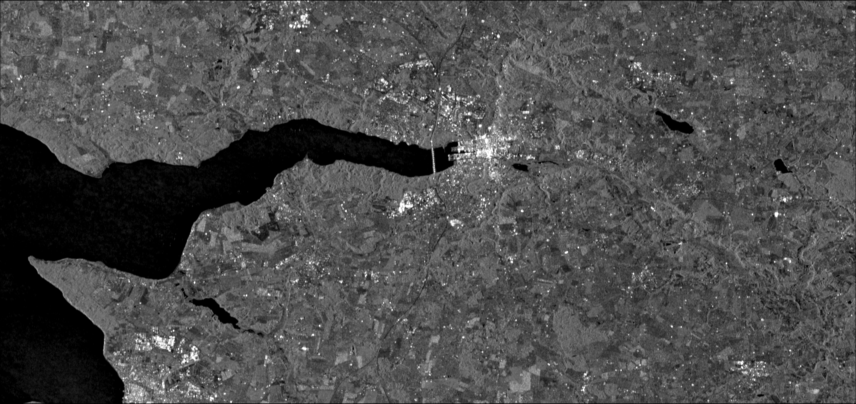

In [36]:
VV_pre_median = dropdims(Statistics.median(cat(VV_pre...,dims=3),dims=3),dims=3);
img = Colors.Gray.(db_scale_img(VV_pre_median,min_vv,max_vv))

In [37]:
file_path = joinpath(data_folder,"flood","VV_pre_median")
JLD.save(file_path*".jld", "data", VV_pre_median)
FileIO.save(file_path*".png",img)

In [38]:
VV_pre = 0
VV = 0 

0

In [39]:
VH = _load_jld(VH_files,data_folder);
VH_co = VH[1]
VH_pre = VH[2:end]
VH_pre = SlcUtil.temporal_filter(VH_pre,5);

In [40]:
VV_co_filt , VH_co_filt = SlcUtil.temporal_filter([VV_co ,VH_co ],5);

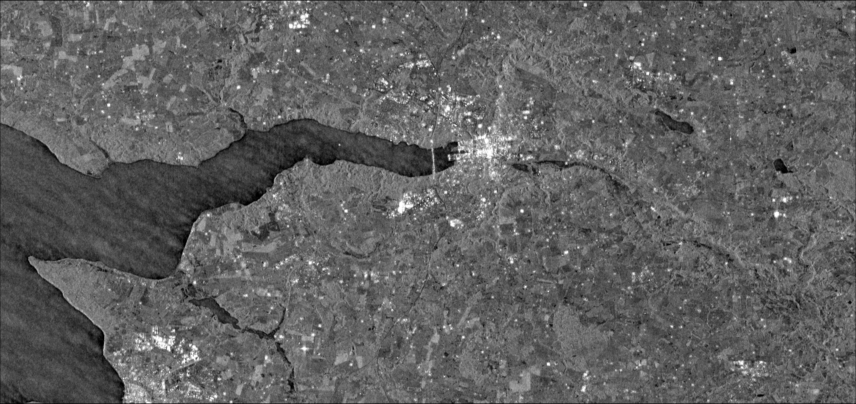

In [41]:
img = Colors.Gray.(db_scale_img(VV_co_filt,min_vv,max_vv))
file_path = joinpath(data_folder,"flood","VV_co")
JLD.save(file_path*".jld", "data", VV_co_filt)
FileIO.save(file_path*".png",img)
img

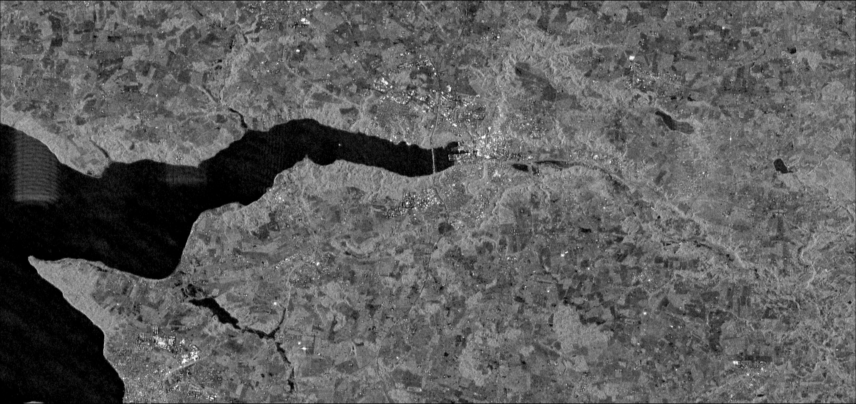

In [42]:
img = Colors.Gray.(db_scale_img(VH_co_filt,min_vh,max_vh))
file_path = joinpath(data_folder,"flood","VH_co")
JLD.save(file_path*".jld", "data", VH_co_filt)
FileIO.save(file_path*".png",img)
img

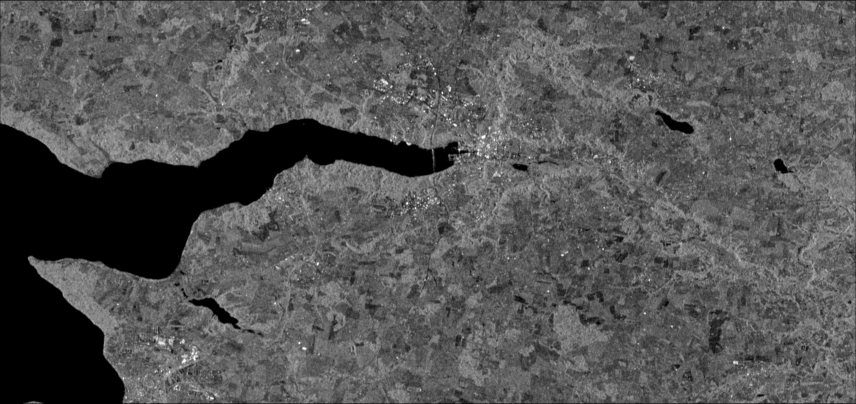

In [43]:
Colors.Gray.(db_scale_img(VH[8],min_vh,max_vh))

In [44]:
## vh 2 er lidt underlig 

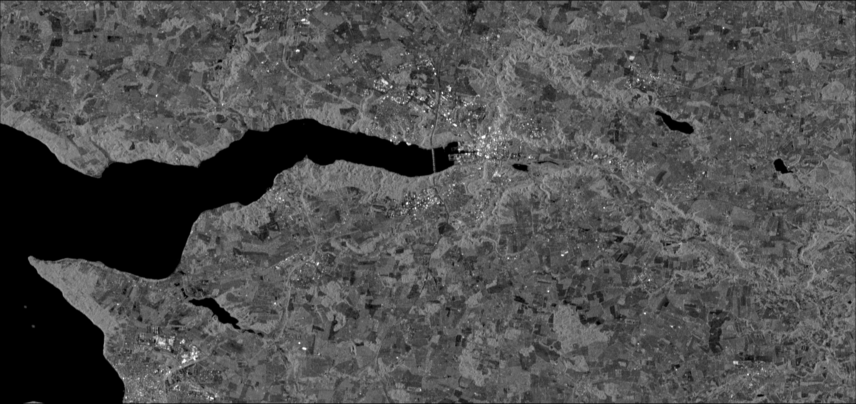

In [45]:
VH_pre_mean = sum(VH_pre)./length(VH_pre)
img = Colors.Gray.(db_scale_img(VH_pre_mean,min_vh,max_vh))

file_path = joinpath(data_folder,"flood","VH_pre")
JLD.save(file_path*".jld", "data", VH_pre_mean)
FileIO.save(file_path*".png",img)
img

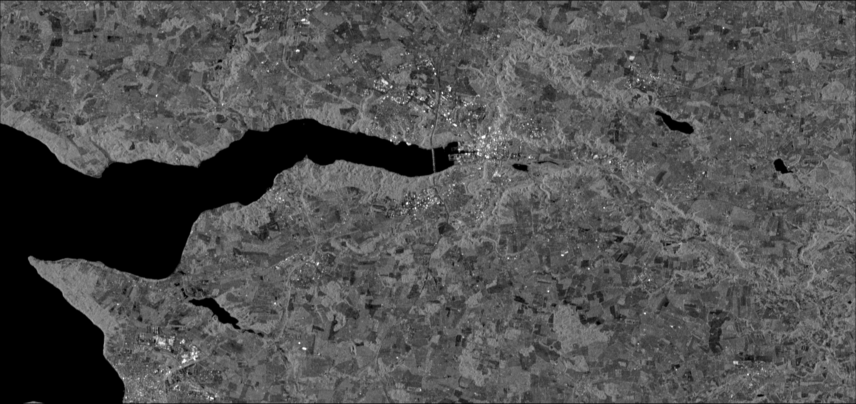

In [46]:
VH_pre_median = dropdims(Statistics.median(cat(VH_pre...,dims=3),dims=3),dims=3);
img = Colors.Gray.(db_scale_img(VH_pre_median,min_vh,max_vh))
file_path = joinpath(data_folder,"flood","VH_pre_median")
JLD.save(file_path*".jld", "data", VH_pre_median)
FileIO.save(file_path*".png",img)
img

In [47]:
VH_pre = 0
VH = 0 

0

In [49]:
coh = _load_jld(coherence_VV_files,data_folder);
coh = [abs.(elem) for elem in coh];

coh_co = coh[1]
coh_pre = coh[2:end];

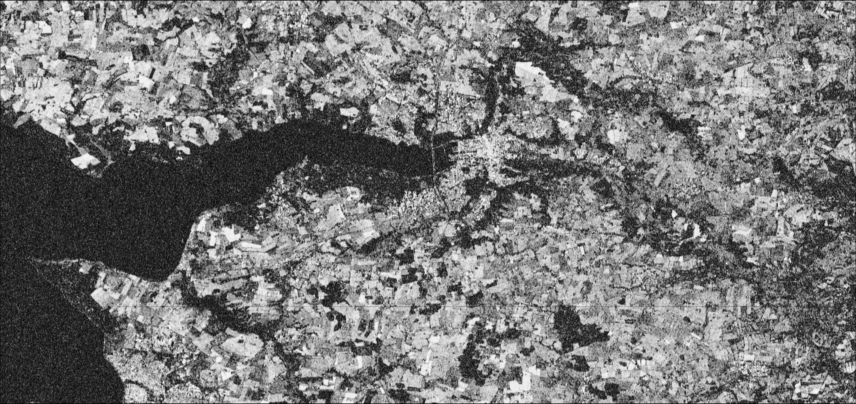

In [56]:
img = Colors.Gray.(coh[7])

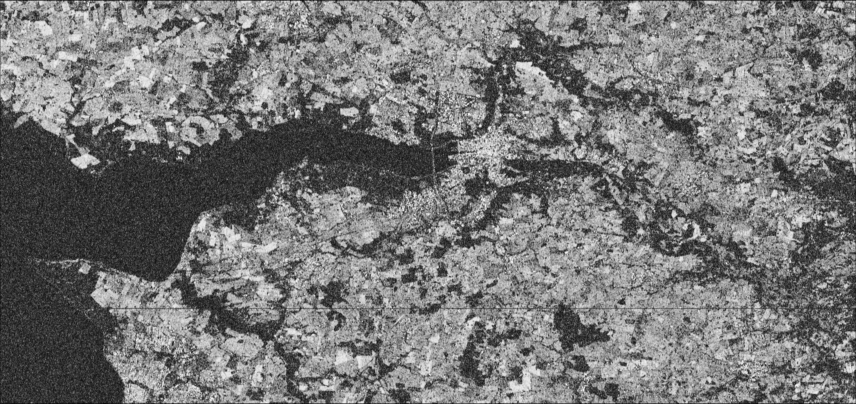

In [57]:
img = Colors.Gray.(coh_co)
file_path = joinpath(data_folder,"flood","coherrence_co")
JLD.save(file_path*".jld", "data", coh_co)
FileIO.save(file_path*".png",img)
img

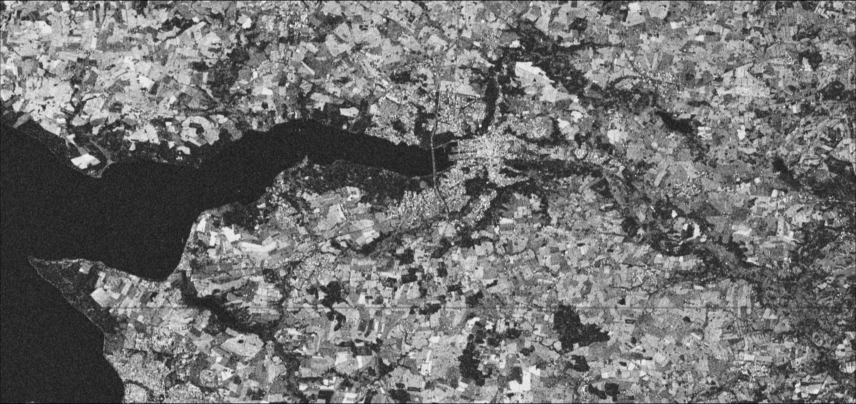

In [59]:
coh_pre_mean = sum(coh_pre)./length(coh_pre)
img = Colors.Gray.(coh_pre_mean)
file_path = joinpath(data_folder,"flood","coherrence_pre")
JLD.save(file_path*".jld", "data", coh_pre_mean)
FileIO.save(file_path*".png",img)
img

In [60]:
joinpath(data_folder,"flood")

"/Users/simon/Documents/DTU fag/Speciale/vejle_new/flood"

In [64]:
[i+j for i =1:5,j=5:8]

5×4 Array{Int64,2}:
  6   7   8   9
  7   8   9  10
  8   9  10  11
  9  10  11  12
 10  11  12  13

# Ribe

In [48]:
data_folder = "/Users/simon/Documents/DTU fag/Speciale/ribe_new"
data_folder = "/home/data/simon/processed/test_areas/ribe_new"

"/home/data/simon/processed/test_areas/ribe_new"

In [49]:
VV_files,VH_files,coherence_VV_files,coherence_VH_files = _sort_prossed_files(data_folder);

In [50]:
VV_files

6-element Array{String,1}:
 "sigma_S1A_VV_20200220.jld"
 "sigma_S1B_VV_20200214.jld"
 "sigma_S1A_VV_20200208.jld"
 "sigma_S1A_VV_20200127.jld"
 "sigma_S1B_VV_20200121.jld"
 "sigma_S1A_VV_20200115.jld"

In [51]:
VV = _load_jld(VV_files,data_folder);

VV_co = VV[1]
VV_pre = VV[[3,4,6]]
VV_pre = SlcUtil.temporal_filter(VV_pre,5);

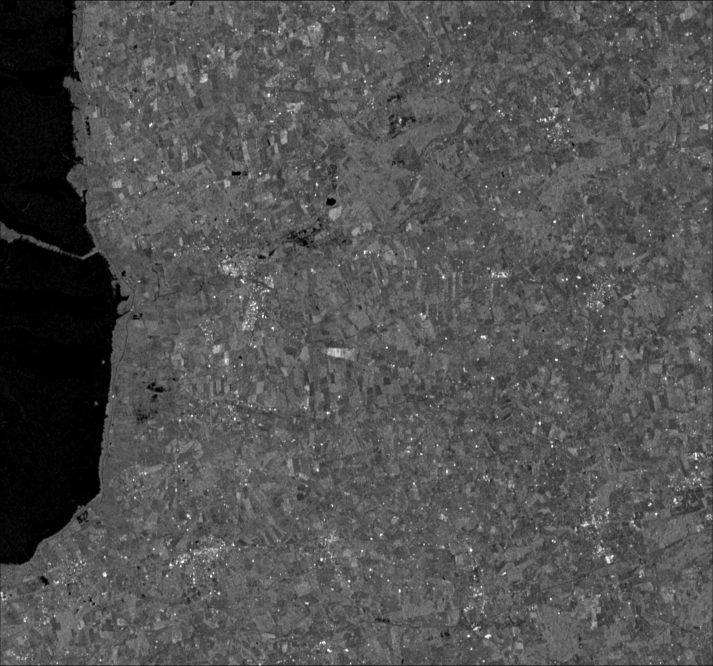

In [52]:
VV_co = VV[1]
VV_pre = VV[3:end]
VV_pre = SlcUtil.temporal_filter(VV_pre,5);
VV_pre_median = dropdims(Statistics.median(cat(VV_pre...,dims=3),dims=3),dims=3);
img = Colors.Gray.(db_scale_img(VV_pre_median,min_vv,max_vv))

file_path = joinpath(data_folder,"flood","VV_pre_median")
JLD.save(file_path*".jld", "data", VV_pre_median)
FileIO.save(file_path*".png",img)
img

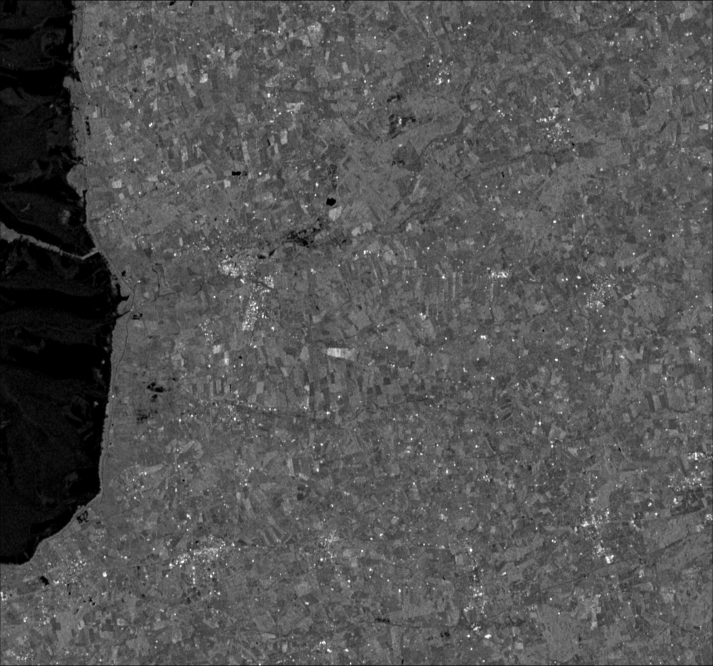

In [53]:
VV_pre_mean =  sum(VV_pre)./length(VV_pre)
img = Colors.Gray.(db_scale_img(VV_pre_mean,min_vv,max_vv))
file_path = joinpath(data_folder,"flood","VV_pre")
JLD.save(file_path*".jld", "data", VV_pre_mean)
FileIO.save(file_path*".png",img)
img

In [54]:
VH = _load_jld(VH_files,data_folder);


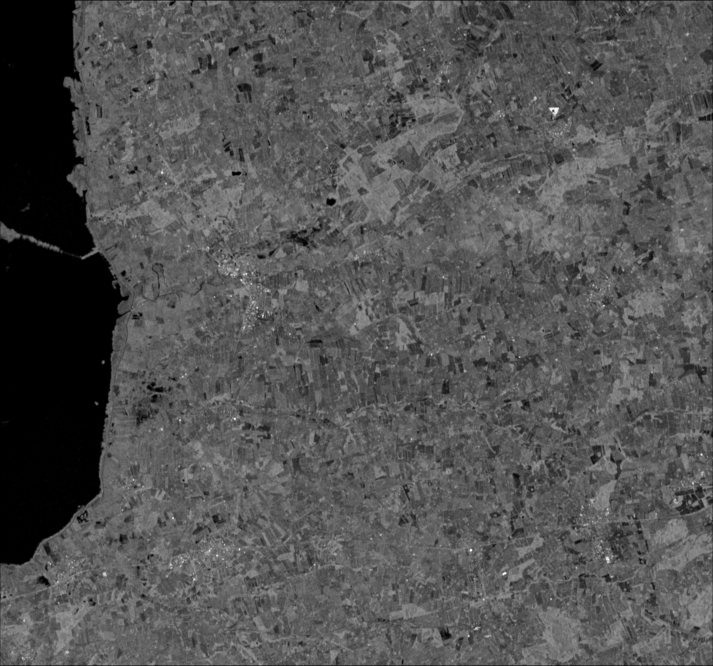

In [55]:
VH_co = VH[1]
VH_pre = VH[3:end]
VH_pre = SlcUtil.temporal_filter(VH_pre,5);
VH_pre_median = dropdims(Statistics.median(cat(VH_pre...,dims=3),dims=3),dims=3);
img = Colors.Gray.(db_scale_img(VH_pre_median,min_vh,max_vh))
file_path = joinpath(data_folder,"flood","VH_pre_median")
JLD.save(file_path*".jld", "data", VH_pre_median)
FileIO.save(file_path*".png",img)
img

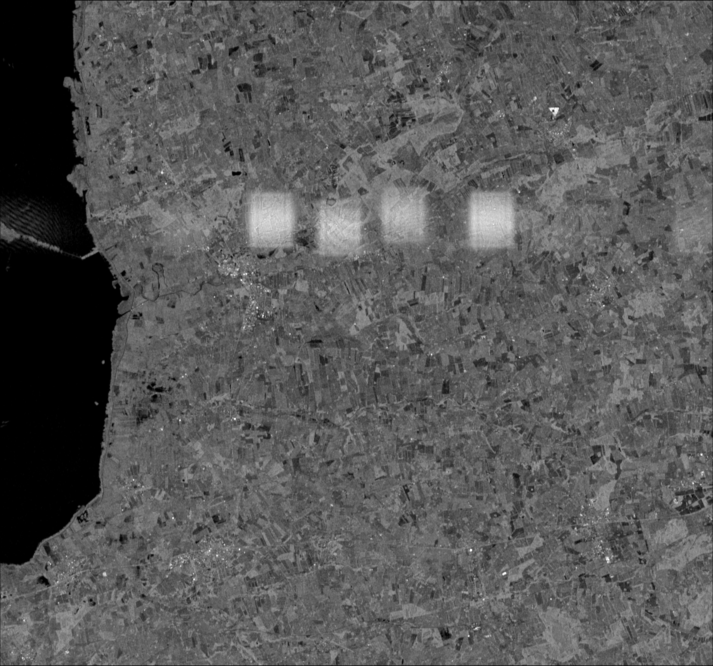

In [56]:
VH_pre_mean = sum(VH_pre)./length(VH_pre)
img = Colors.Gray.(db_scale_img(VH_pre_mean,min_vh,max_vh))

In [57]:
VH_co = VH[1]
VH_pre = VH[[4,5,6]]
VH_pre = SlcUtil.temporal_filter(VH_pre,5);

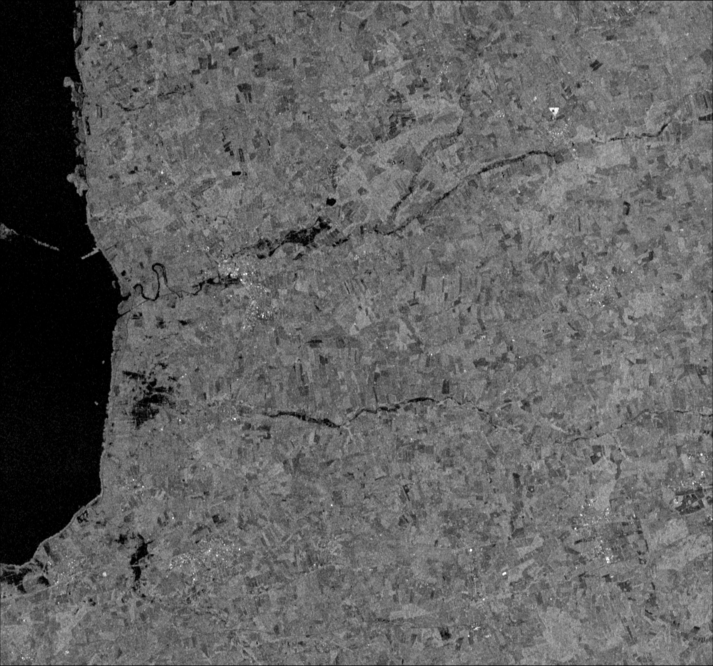

In [58]:
Colors.Gray.(db_scale_img(VH[6],min_vh,max_vh))

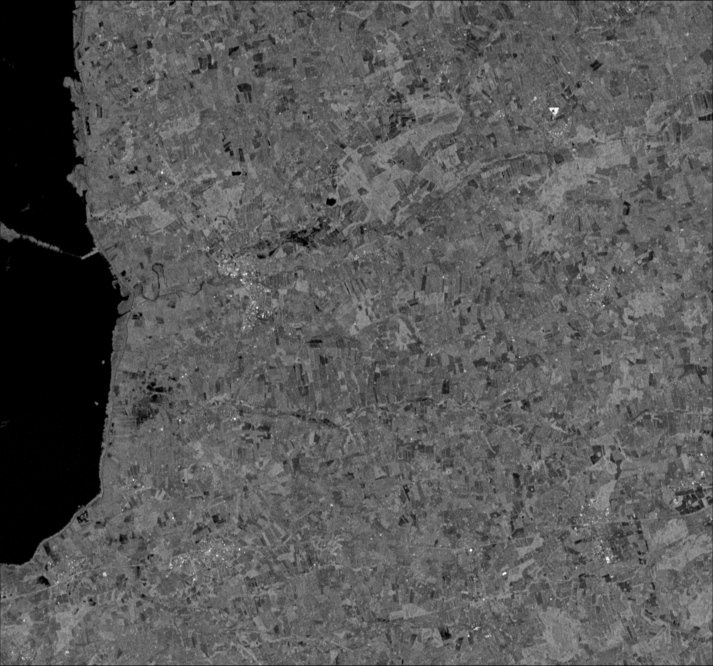

In [59]:

VH_pre_mean = sum(VH_pre)./length(VH_pre)
img = Colors.Gray.(db_scale_img(VH_pre_mean,min_vh,max_vh))
file_path = joinpath(data_folder,"flood","VH_pre")
JLD.save(file_path*".jld", "data", VH_pre_mean)
FileIO.save(file_path*".png",img)
img

In [60]:
VV_co_filt , VH_co_filt = SlcUtil.temporal_filter([VV_co ,VH_co ],5);

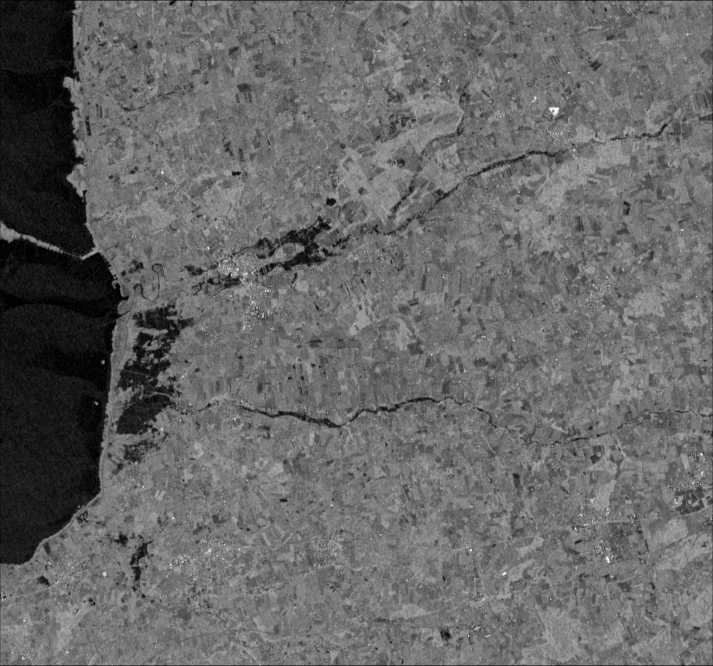

In [61]:
img = Colors.Gray.(db_scale_img(VH_co_filt,min_vh,max_vh))
file_path = joinpath(data_folder,"flood","VH_co")
JLD.save(file_path*".jld", "data", VH_co_filt)
FileIO.save(file_path*".png",img)
img

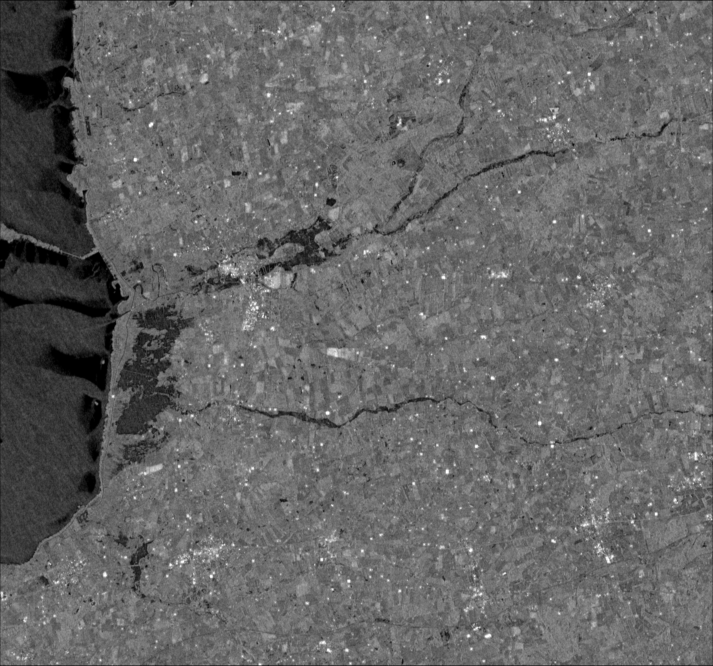

In [62]:
img = Colors.Gray.(db_scale_img(VV_co_filt,min_vv,max_vv))
file_path = joinpath(data_folder,"flood","VV_co")
JLD.save(file_path*".jld", "data", VV_co_filt)
FileIO.save(file_path*".png",img)
img

# Houston 

In [63]:
data_folder = "/Users/simon/Documents/DTU fag/Speciale/houston_new"
data_folder = "/home/data/simon/processed/test_areas/houston_new"

"/home/data/simon/processed/test_areas/houston_new"

In [64]:
VV_files,VH_files,coherence_VV_files,coherence_VH_files = _sort_prossed_files(data_folder);

In [65]:
VV = _load_jld(VV_files,data_folder);

In [66]:
VV_files

7-element Array{String,1}:
 "sigma_S1B_VV_20170830.jld"
 "sigma_S1A_VV_20170824.jld"
 "sigma_S1B_VV_20170818.jld"
 "sigma_S1A_VV_20170812.jld"
 "sigma_S1B_VV_20170806.jld"
 "sigma_S1A_VV_20170731.jld"
 "sigma_S1B_VV_20170725.jld"

In [67]:
VV_co = VV[1]
VV_pre = VV[2:end]
VV_pre = SlcUtil.temporal_filter(VV_pre,5);

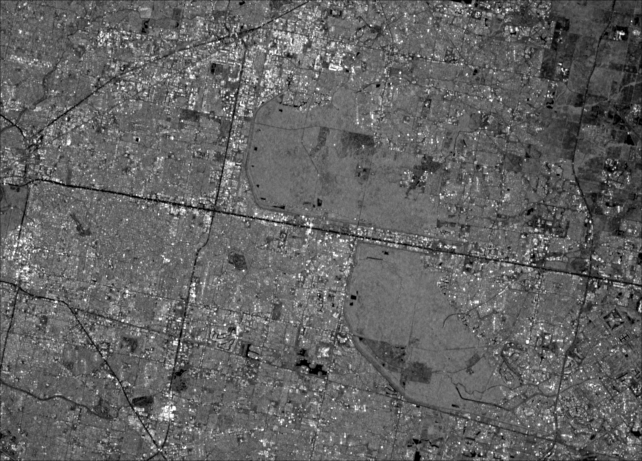

In [68]:
Colors.Gray.(db_scale_img(VV_pre[4],min_vv,max_vv))

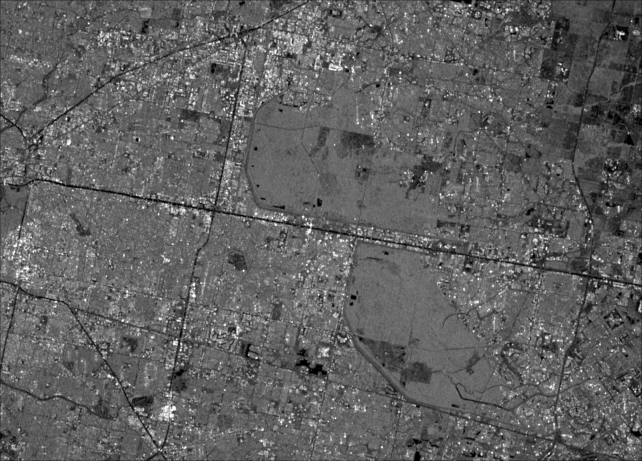

In [69]:
VV_co = VV[1]
VV_pre = VV[3:end]
#VV_pre = SlcUtil.temporal_filter(VV_pre,5);
VV_pre_median = dropdims(Statistics.median(cat(VV_pre...,dims=3),dims=3),dims=3);
img = Colors.Gray.(db_scale_img(VV_pre_median,min_vv,max_vv))

file_path = joinpath(data_folder,"flood","VV_pre_median")
JLD.save(file_path*".jld", "data", VV_pre_median)
FileIO.save(file_path*".png",img)
img

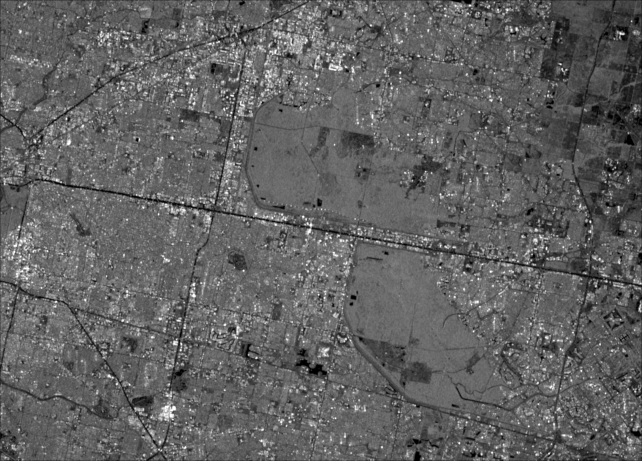

In [70]:
VV_pre_mean =  sum(VV_pre)./length(VV_pre)
img = Colors.Gray.(db_scale_img(VV_pre_mean,min_vv,max_vv))
file_path = joinpath(data_folder,"flood","VV_pre")
JLD.save(file_path*".jld", "data", VV_pre_mean)
FileIO.save(file_path*".png",img)
img

In [71]:
VH = _load_jld(VH_files,data_folder);


In [72]:
VH_co = VH[1]
VH_pre = VH[2:end]
VH_pre = SlcUtil.temporal_filter(VH_pre,5);

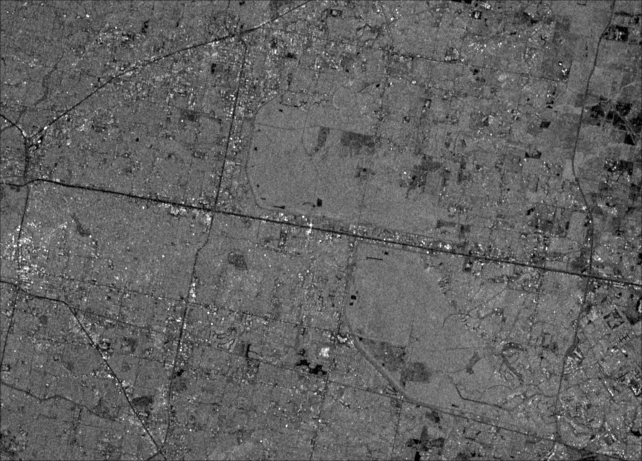

In [73]:
Colors.Gray.(db_scale_img(VH[7],min_vh,max_vh))

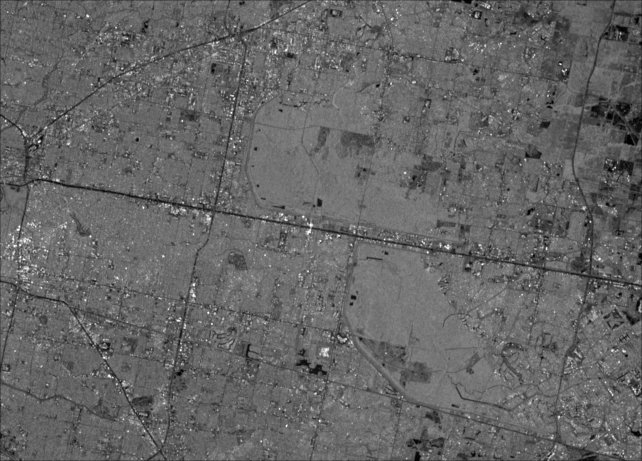

In [74]:
VH_pre_median = dropdims(Statistics.median(cat(VH_pre...,dims=3),dims=3),dims=3);
img = Colors.Gray.(db_scale_img(VH_pre_median,min_vh,max_vh))
file_path = joinpath(data_folder,"flood","VH_pre_median")
JLD.save(file_path*".jld", "data", VH_pre_median)
FileIO.save(file_path*".png",img)
img

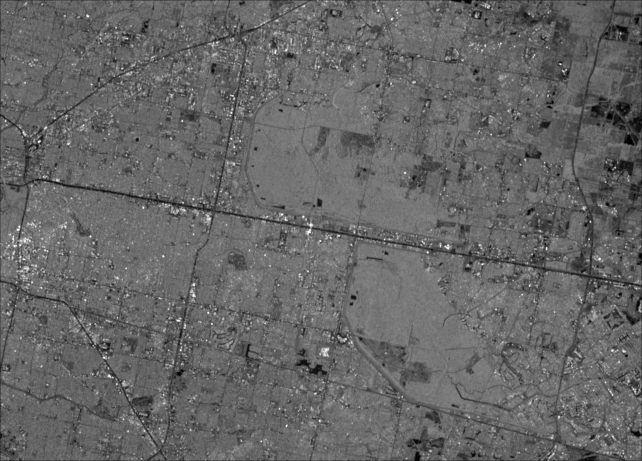

In [75]:

VH_pre_mean = sum(VH_pre)./length(VH_pre)
img = Colors.Gray.(db_scale_img(VH_pre_mean,min_vh,max_vh))
file_path = joinpath(data_folder,"flood","VH_pre")
JLD.save(file_path*".jld", "data", VH_pre_mean)
FileIO.save(file_path*".png",img)
img

In [76]:
VV_co_filt , VH_co_filt = SlcUtil.temporal_filter([VV_co ,VH_co ],5);

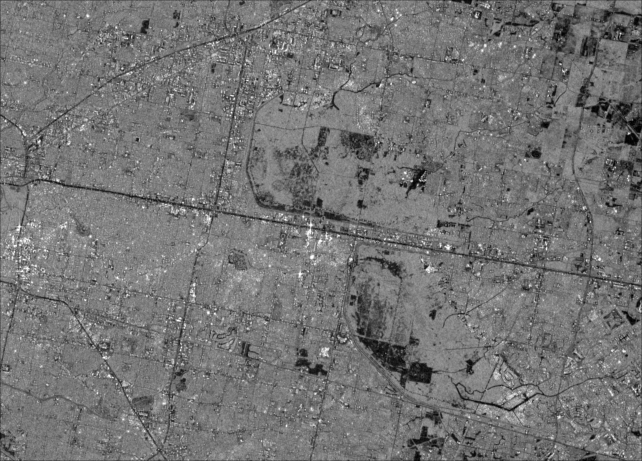

In [77]:
img = Colors.Gray.(db_scale_img(VH_co_filt,min_vh,max_vh))
file_path = joinpath(data_folder,"flood","VH_co")
JLD.save(file_path*".jld", "data", VH_co_filt)
FileIO.save(file_path*".png",img)
img

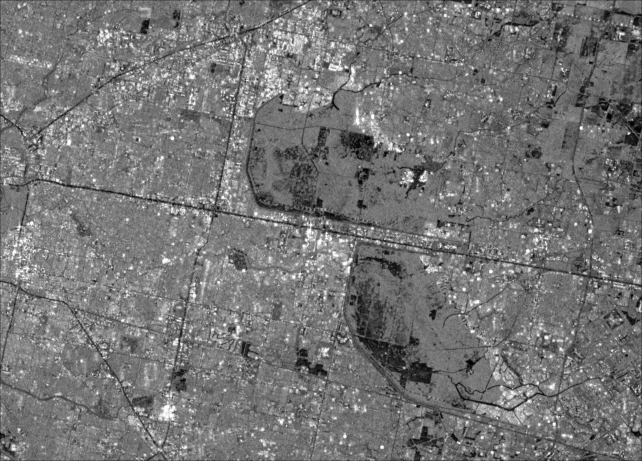

In [78]:
img = Colors.Gray.(db_scale_img(VV_co_filt,min_vv,max_vv))
file_path = joinpath(data_folder,"flood","VV_co")
JLD.save(file_path*".jld", "data", VV_co_filt)
FileIO.save(file_path*".png",img)
img